In [13]:
import json
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np

from topostats.filters import Filters
from topostats.grains import Grains
from topostats.grainstats import GrainStats
from topostats.io import read_yaml, write_yaml
from topostats.logs.logs import setup_logger, LOGGER_NAME
from topostats.plottingfuncs import plot_and_save
from topostats.tracing.dnatracing import dnaTrace, traceStats
from topostats.utils import find_images, get_out_path, update_config, convert_path, create_empty_dataframe

# Set the base directory to be current working directory of the Notebook
BASE_DIR = Path().cwd()
FILE_EXT = ".spm"
# Search for *.spm files in this directory
spm_files = find_images(base_dir=BASE_DIR.parent / "tests", file_ext=FILE_EXT)

# spm_files

from topostats.io import read_yaml
config = read_yaml("config.yaml")
# print(f"Top level keys of config.ymal : \n\n {config.keys()}\n")
# print(f"Configuration options for Filter : \n\n {config['filter'].keys()}")

print(json.dumps(config["filter"], indent=4))

filter_config = config["filter"]
filter_config.pop("run")
grain_config = config["grains"]
grain_config.pop("run")
grainstats_config = config["grainstats"]
grainstats_config.pop("run")
dnatracing_config = config["dnatracing"]
dnatracing_config.pop("run")
plotting_config = config["plotting"]
plotting_config.pop("run")
plotting_dictionary = plotting_config["plot_dict"]


{
    "run": true,
    "channel": "Height",
    "amplify_level": 1.0,
    "threshold_method": "absolute",
    "otsu_threshold_multiplier": 1.0,
    "threshold_std_dev": 1.0,
    "threshold_absolute_lower": -100.0,
    "threshold_absolute_upper": 100.0
}


PNG
shape: (1024, 1024)
[Tue, 27 Sep 2022 16:19:22] [INFO    ] [topostats] Extracting filename from : images/slant_3.png
[Tue, 27 Sep 2022 16:19:22] [INFO    ] [topostats] Filename : slant_3
file ext: .png
  skipping initial stuff due to loading png
file type: png
PNG
assigning im_array to pixels
  initial aligning
[Tue, 27 Sep 2022 16:19:22] [INFO    ] [topostats] [slant_3] : Masking disabled
[Tue, 27 Sep 2022 16:19:22] [INFO    ] [topostats] [slant_3] : Row and column medians calculated.
[Tue, 27 Sep 2022 16:19:22] [INFO    ] [topostats] [slant_3] : Median Row Height: 65.0
[Tue, 27 Sep 2022 16:19:22] [INFO    ] [topostats] [slant_3] : Rows aligned
[Tue, 27 Sep 2022 16:19:22] [INFO    ] [topostats] [slant_3] : Masking disabled
[Tue, 27 Sep 2022 16:19:22] [INFO    ] [topostats] [slant_3] : Row and column medians calculated.
[Tue, 27 Sep 2022 16:19:22] [INFO    ] [topostats] [slant_3] : X-gradient: 0.0
[Tue, 27 Sep 2022 16:19:22] [INFO    ] [topostats] [slant_3] : Y-gradient: 0.0
[Tue, 

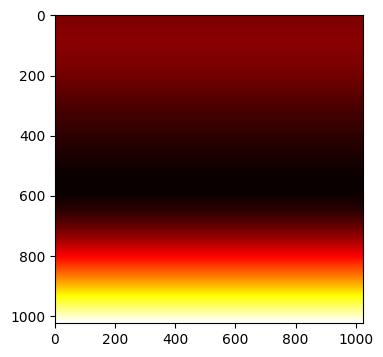

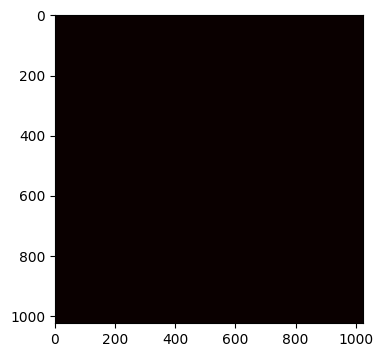

In [21]:
from topostats.filters import Filters
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

file_name = 'images/slant_3.png'
im = Image.open(file_name)
print(im.format)
im_array = np.array(im, dtype=float)
im_array = im_array[:, :, 0]
print(f'shape: {im_array.shape}')


filtered_image = Filters(file_name,
                         threshold_method=config["filter"]["threshold_method"],
                         otsu_threshold_multiplier=config["filter"]["otsu_threshold_multiplier"],
                         threshold_std_dev=config["filter"]["threshold_std_dev"],
                         threshold_absolute_lower=config["filter"]["threshold_absolute_lower"],
                         threshold_absolute_upper=config["filter"]["threshold_absolute_upper"],
                         channel=config["filter"]["channel"],
                         amplify_level=config["filter"]["amplify_level"],
                         output_dir=config["output_dir"],
                         quiet=config["quiet"])
filtered_image.filter_image()

# # NB - Because of the one-to-one mapping of configuration options to Filters() options we can use keyword arguments to
# #      unpack the options, the below is the same as explicitly stating the values you want to map.
# filtered_image = Filters('images/line0.png', **filter_config)
# filtered_image.filter_image()

fig, ax = plt.subplots(figsize=(4,4))
plt.imshow(im_array, cmap='hot')
plt.show()

fig, ax = plt.subplots(figsize=(4,4))
plt.imshow(filtered_image.images["zero_averaged_background"], cmap='hot')
plt.show()